**Previsão se uma massa de mamografia é benigna ou maligna**

Conjunto de dados públicos  "massas mamográficas" do repositório UCI (https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

Estes dados contêm 961 ocorrências de massas detectadas em mamografias, e contém os seguintes atributos:

BI-RADS avaliação: 1 to 5 (ordinal)

Age: Idade da paciente em anos (inteiro)

Shape: Forma da Massa: redonda=1 oval=2 lobular=3 irregular=4 (nominal)

Margin: Margem de Massa : circunscrita =1 microlobulado=2 obscuracida=3 Mal- Definida=4 Espiculada=5 (nominal)

Density: Densidade de Massa: Alta=1 Isodensos=2 Baixa=3 Contendo Gordura=4 (ordinal)

Severity: Gravidade: benigna=0 ou maligna=1 (binominal)

BI-RADS(Breast Imaging Reporting and Data System) é uma avaliação de quão confiável é a classificação de gravidade; não é um atributo "preditivo" e por isso vamos descartá-lo. A idade, forma da massa, margem de massa, e  densidade são atributos e os recursos com os quais construiremos nosso modelo, e "gravidade" é a classificação que tentaremos prever com base nesses atributos.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dados_massas = pd.read_csv('/content/drive/MyDrive/mammographic_masses.data.txt')
dados_massas.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [3]:
dados_massas = pd.read_csv('/content/drive/MyDrive/mammographic_masses.data.txt', na_values=['?'], names=['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
dados_massas.head(10)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


In [4]:
dados_massas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   age       956 non-null    float64
 2   shape     930 non-null    float64
 3   margin    913 non-null    float64
 4   density   885 non-null    float64
 5   severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [5]:
dados_massas.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
dados_massas.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

**Preenchendo registros faltantes**




In [ ]:
dados_massas.loc[(dados_massas['age'].isnull()) |
              (dados_massas['shape'].isnull()) |
              (dados_massas['margin'].isnull()) |
              (dados_massas['density'].isnull())]

In [10]:
dados_massas.head(100)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
95,5.0,54.0,4.0,4.0,3.0,1
96,4.0,40.0,1.0,1.0,NaN,0
97,4.0,47.0,2.0,1.0,NaN,0
98,5.0,62.0,4.0,4.0,3.0,0


In [12]:
dados_massas.dropna(inplace=True)


In [13]:
dados_massas.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


**Analisando as distribuições das colunas **

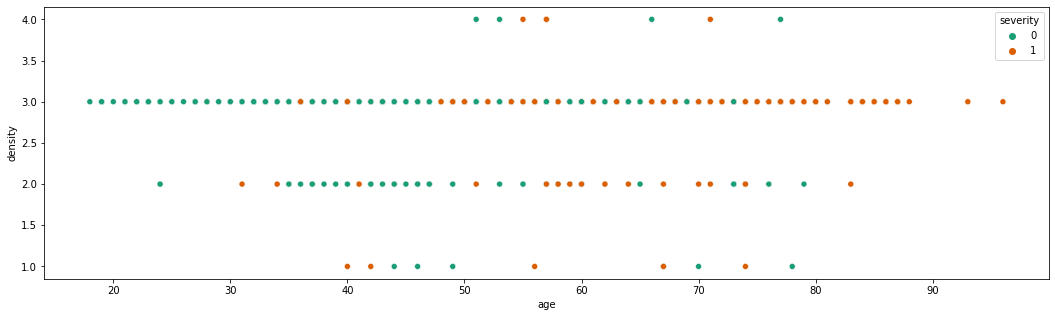

In [14]:
f, ax=plt.subplots(figsize=(18,5))
sns.scatterplot(x='age', y='density', hue='severity', palette="Dark2", data=dados_massas)

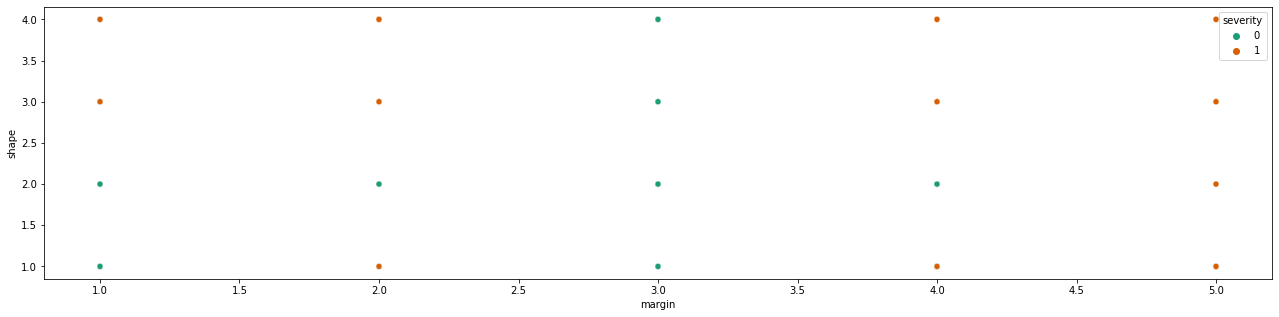

In [15]:
f, ax=plt.subplots(figsize=(22,5))
sns.scatterplot(x='margin', y='shape', hue='severity', palette="Dark2", data=dados_massas)

In [16]:
#substituindo algumas colunas
dm_sub = dados_massas[['age', 'shape', 'margin', 'density']]

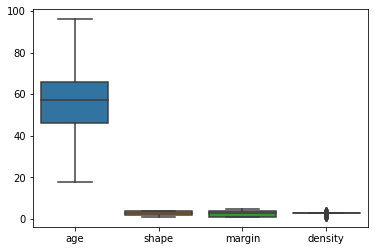

In [17]:
#plota boxplot de algumas colunas
sns.boxplot(data=dm_sub)


# **Algoritmos de Machine Learning**

**Separa os dados e suas classes**

In [18]:
x = dados_massas[['age', 'shape',
                             'margin', 'density']].values

y = dados_massas['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

x                           

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [19]:
#importa o StadardScaler da scikit-learn
from sklearn import preprocessing


In [86]:
#cria o objeto scaler 
#aplicando o padronizador nos dados
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

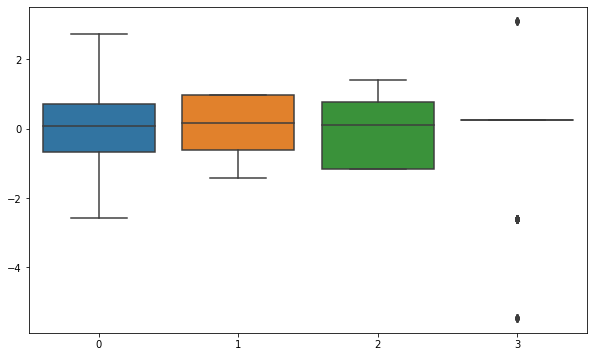

In [87]:
#visualizando os boxplot dos dados
plt.figure(figsize=(10,6))
sns.boxplot(data=x)

**Separando porção de treino e testes**

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Aplicando Machine Learning nos Modelos**

**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [24]:
clf_tree.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

**Validação do Modelo**

In [25]:
clf_tree.score(x_test, y_test)

0.7771084337349398

**Cross Validation**

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
clf_tree = DecisionTreeClassifier()
cv_scores = cross_val_score(clf_tree, x, y, cv=10)

In [28]:
cv_scores.mean()

0.7325301204819276

**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf_tree = RandomForestClassifier(n_estimators =10)
cv_scores = cross_val_score(clf_tree, x, y, cv=10)


In [31]:
cv_scores.mean()

0.7481927710843375

**SVM**

In [32]:
from sklearn import svm
C= 1.0
clf = svm.SVC(kernel ='linear',C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.7975903614457832

In [33]:
C = 1.0
clf = svm.SVC(kernel ='rbf', C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.8012048192771084

In [34]:
C = 1.0
clf = svm.SVC(kernel ='sigmoid', C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.7457831325301204

In [35]:
C = 1.0
clf = svm.SVC(kernel ='poly', C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.7903614457831326

**KNN**

In [36]:
from sklearn import neighbors

In [37]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, x, y, cv=10)

cv_scores.mean()

0.7927710843373494

In [38]:
#loop para executar KNN com valores de K variando de 1 a 50.
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, x, y, cv=10)
    print (n, cv_scores.mean())

1 0.7216867469879519
2 0.689156626506024
3 0.7566265060240964
4 0.7337349397590361
5 0.7746987951807228
6 0.7698795180722892
7 0.7987951807228916
8 0.7746987951807229
9 0.7891566265060241
10 0.7927710843373494
11 0.7915662650602411
12 0.7819277108433735
13 0.7891566265060241
14 0.7879518072289157
15 0.7855421686746988
16 0.7807228915662651
17 0.7783132530120482
18 0.7795180722891566
19 0.7843373493975904
20 0.7843373493975904
21 0.7879518072289156
22 0.7843373493975904
23 0.7795180722891566
24 0.7783132530120482
25 0.7831325301204819
26 0.7855421686746988
27 0.7855421686746988
28 0.789156626506024
29 0.7867469879518072
30 0.791566265060241
31 0.7879518072289157
32 0.7903614457831325
33 0.7903614457831325
34 0.7843373493975903
35 0.7855421686746987
36 0.7879518072289156
37 0.7831325301204819
38 0.7867469879518072
39 0.7831325301204819
40 0.7831325301204819
41 0.780722891566265
42 0.7831325301204819
43 0.7819277108433734
44 0.7819277108433734
45 0.7831325301204819
46 0.7843373493975904
4

**Naive Bayes**

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
scaler = preprocessing.MinMaxScaler()
x_minmax = scaler.fit_transform(x)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, x_minmax, y, cv=10)

cv_scores.mean()

0.7855421686746988

**Regressão Logística**

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.8072289156626505

**Redes Neurais**

In [43]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [44]:
def create_model():
    model = Sequential()
    #4 features de entradas indo para uma camada de  6 neurônios.
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # Camada de saída com uma classificação  binaria (benigna or maligna)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    #modelo de compilação.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [47]:
# Modelo Keras com um estimador compatível
estimador = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
cv_scores = cross_val_score(estimador, x, y, cv=10)
cv_scores.mean()


0.8024096369743348

# **PIPELINE**

In [61]:
#Importando as biblitecas de Pipeline e Pré_processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Cross Validation**

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [63]:
#função que retorna a acurácia após fazer uma validação cruzada (cross validation)
def Acuracia(clf, X,y):
    resultados = cross_val_predict(clf, x, y, cv=10)
    return accuracy_score(y,resultados)

In [64]:
#criando os pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='linear'))
    ])
pip_2 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='rbf'))
    ])
pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='sigmoid'))
    ])
pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='poly'))
    ])
pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier())
    ])
pip_6 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators =10))
    ])
pip_7 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', neighbors.KNeighborsClassifier(n_neighbors=10))
    ])
pip_8 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', MultinomialNB())
    ])
pip_9 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
    ])

     

In [65]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_1
Acuracia(pip_1, x ,y)

0.7987951807228916

In [66]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_2
Acuracia(pip_2, x ,y)

0.8012048192771084

In [67]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_3
Acuracia(pip_3, x ,y)

0.744578313253012

In [68]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_4
Acuracia(pip_4, x ,y)

0.7927710843373494

In [69]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_5
Acuracia(pip_5, x ,y)

0.7373493975903614

In [70]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_6
Acuracia(pip_6, x ,y)

0.7530120481927711

In [71]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_7
Acuracia(pip_7, x ,y)

0.7867469879518072

In [72]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_8
Acuracia(pip_8, x ,y)

0.7855421686746988

In [73]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_9
Acuracia(pip_9, x ,y)

0.8072289156626506

# **TUNNING**

In [ ]:
#Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [75]:
#lista de valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

In [76]:
#lista de valores de Gama
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [77]:
#define um dicionário que recebe as listas de  paramêtros e valores
parametros_grid = dict(clf__C= lista_C, clf__gamma = lista_gamma)


In [78]:
#objeto grid recebe paramêtros de Pipeline pip_2 e configurações de cross validation 
#Faz testes exaustivos de combinação por combinação
grid = GridSearchCV(pip_2, parametros_grid, cv=10, scoring='accuracy')

In [80]:
#aplica o GridSearchCv passando os dados de treino e classe
grid.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

# **RESULTADOS DO GRID**

In [81]:
#imprime o melhor paramêtro
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.01}

In [82]:
#imprime o melhor resultado
grid.best_score_

0.8060240963855421